In [139]:
# importing libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


from ipywidgets import interact

In [98]:
# reading the dataset --Agriculture.csv
data=pd.read_csv("Agriculture.csv")

In [99]:
data.shape

(2200, 8)

In [100]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [101]:
# checking for null values in the dataset
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [102]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [103]:
# overall summary of data
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [104]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [105]:
col=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall','label']

In [106]:
# average values required for all types of crops
data.groupby('label')[col].mean()

,N,P,K,temperature,humidity,ph,rainfall
label,,,,,,,
apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798


In [107]:
# removing label colums for cluster analysis
x=data.drop(["label"],axis=1)

x.shape

(2200, 7)

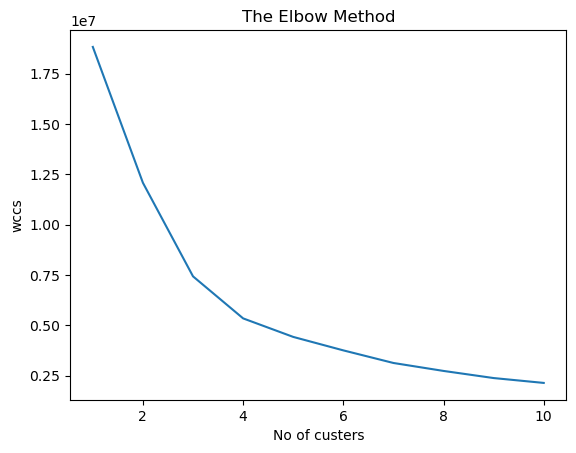

In [108]:
# determining the optimum number of clusters within the dataset

wccs=[]
for i in range(1,11):
    km = KMeans( n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10,random_state=0 )
    km.fit(x)
    wccs.append(km.inertia_)
    
# plotting
plt.plot(range(1,11), wccs)
plt.title("The Elbow Method")
plt.xlabel("No of custers")
plt.ylabel("wccs")
plt.show()

In [109]:
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 30, random_state = 0)
y_means = km.fit_predict(x)


In [110]:
y_means = pd.DataFrame(y_means)
y_means.value_counts()

1    1011
3     515
0     474
2     200
dtype: int64

In [111]:
z = pd.concat([y_means,data['label']], axis =1)
z = z.rename(columns = {0: 'cluster'})
# print(z.groupby("cluster")['label'].unique())
clusters=z.groupby("cluster")['label'].unique()
print("---------printing clusters-----------")
for i in range(0,4):
    print("cluster",i," : " ,clusters[i])

---------printing clusters-----------
cluster 0  :  ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']
cluster 1  :  ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
cluster 2  :  ['grapes' 'apple']
cluster 3  :  ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']


In [112]:
# model building....

In [113]:
x=data.drop(["label"],axis=1)
y=data['label']

print(x.shape)
print(y.shape)

(2200, 7)
(2200,)


In [119]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1760, 7)
(440, 7)
(1760,)
(440,)


In [130]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

C:\Users\vasu5\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


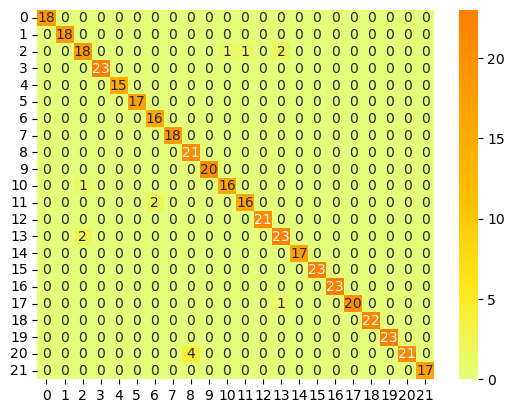

In [137]:
# Confusion Matrix

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot = True, cmap = "Wistia")
plt.show()

In [140]:
# classification report

cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [147]:
data[500:]

,N,P,K,temperature,humidity,ph,rainfall,label
500,3,49,18,27.910952,64.709306,3.692864,32.678919,mothbeans
501,22,59,23,27.322206,51.278688,4.371746,36.503791,mothbeans
502,36,58,25,28.660242,59.318912,8.399136,36.926297,mothbeans
503,4,43,18,29.029553,61.093875,8.840656,72.980166,mothbeans
504,29,54,16,27.780315,54.650300,8.153023,32.050253,mothbeans
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [148]:
pred = model.predict([[29,54,16,27.780315,54.650300,8.153023,32.050253]])
print(pred)

['mothbeans']


C:\Users\vasu5\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [145]:
prediction = model.predict([[90,
                           42,
                           43,
                           20.879744,
                           80,
                           6.5,
                           200]]
)
print(prediction)

['rice']


C:\Users\vasu5\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
